## Vokabularienvergleich

In [37]:
import csv
import json
import nltk
from tabulate import tabulate
from collections import Counter
import string
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

### Datenimport

In [38]:
#Import der manuell ergänzten Version der Tags des ACDH-CH HowTo (ht)
#zusätzliche Informationen: Description, Count

with open("HowTo_ergänzt.json", encoding = "utf-8") as datei:
    ht_orig = json.load(datei)

print(ht_orig)

{'Datenmanagement': {'description': 'Datenmanagement', 'count': '4'}, 'Prosopographic data': {'description': 'Prosopographic data', 'count': '4'}, 'Semantic web': {'description': 'Semantic web', 'count': '4'}, 'Lexicography': {'description': 'The theory and practice of compiling dictionaries.', 'count': '1'}, 'Linguistics': {'description': 'Linguistics', 'count': '1'}, 'UI design': {'description': 'UI (user interface) design', 'count': '1'}, 'TEI': {'description': 'TEI', 'count': '1'}, 'Ontology': {'description': 'An ontology represents entities, data and ideas through the definition of categories, their properties, their interdependencies and relations, that show how the concepts, data and entities are related to a particular subject area, i.e. discourse. An ontology limits the complexity of a subject area and groups data into information and knowledge. When a controlled vocabulary is used to talk about the information and knowledge that are represented in an ontology, communication i

In [39]:
#Import von DARIAH-Campus (dc)
#zusätzliche Informationen: Count

with open("DARIAH-Campus_Topics.json", encoding = "utf-8") as datei:
    dc_orig = json.load(datei)

print(dc_orig)

{'Research infrastructures': '35', 'Data management': '26', 'DH': '22', 'Open science': '21', 'eHeritage': '20', 'Training and education': '19', 'Digital Archives': '14', 'Open access': '13', 'Scholarly editions': '10', 'Scholarly practice': '8', 'Data visualisation': '7', 'Citizen science': '6', 'EOSC': '6', 'Multimodality': '6', 'Computational Imaging': '4', 'Data modeling': '4', 'Design Thinking': '4', 'Open education': '4', 'Project management': '4', 'Repositories & Collections': '4', 'Sustainability': '4', 'TEI': '4', 'XML': '4', 'Feminism': '3', 'Lexicography': '3', 'Metadata': '3', 'Scholarly publishing': '3', 'Source Criticism': '3', 'Spatial humanities': '3', 'Augmented reality': '2', 'Big data': '2', 'Controlled Vocabularies': '2', 'History of Technology': '2', 'Ontologies': '2', 'Semantic Web': '2', 'Software development': '2', 'Sound studies': '2', 'Editing tools': '1', 'Game Studies': '1', 'Geotagging': '1', 'Information Architecture': '1', 'Literacies': '1', 'Machine Lear

In [40]:
#Import der Tags der ACDH-CH-Website (acdh)
#zusätzliche Informationen: Count für Tools, Count für Projekte, Count insgesamt

acdh_orig = {}

with open("Tags_ACDH-CH-Website.csv", encoding = "utf-8") as datei:
    for row in datei:
        element = row.strip().split(";")
        tag = element[0]
        count_tools = element[1]
        count_projects = element[2]
        count = element[3]
        if tag == "\ufeffTag" or tag == "Summe":
            continue
        else:
            acdh_orig[tag] = {"count_tools": count_tools, "count_projects": count_projects, "count": count}

print(acdh_orig)

{'aesthetics of music': {'count_tools': '0', 'count_projects': '2', 'count': '2'}, 'annotation': {'count_tools': '2', 'count_projects': '4', 'count': '6'}, 'archaeology': {'count_tools': '1', 'count_projects': '7', 'count': '8'}, 'austrian music studies': {'count_tools': '0', 'count_projects': '17', 'count': '17'}, 'citizen science': {'count_tools': '0', 'count_projects': '2', 'count': '2'}, 'codicology': {'count_tools': '0', 'count_projects': '4', 'count': '4'}, 'corpora': {'count_tools': '3', 'count_projects': '10', 'count': '13'}, 'corpus linguistics': {'count_tools': '2', 'count_projects': '14', 'count': '16'}, 'critical editions of music': {'count_tools': '0', 'count_projects': '4', 'count': '4'}, 'cultural heritage': {'count_tools': '0', 'count_projects': '16', 'count': '16'}, 'cultural history': {'count_tools': '4', 'count_projects': '17', 'count': '21'}, 'cultural studies': {'count_tools': '0', 'count_projects': '1', 'count': '1'}, 'culture studies': {'count_tools': '0', 'count

In [41]:
#Import der ARCHE-Tags (hasSubject + hasAppliedMethod + hasCategory)

arche_hasSubject_orig = {}
arche_hasAppliedMethod_orig = {}
arche_hasCategory_orig = {}
counter = 0

with open("ARCHE_erweitert_2022-09-29.csv", encoding = "utf-8") as datei:
    for row in datei:
        counter = counter + 1
        element = row.replace("Ã¤", "ä").replace("Ã¶", "ö").replace("Ã¼", "ü").replace("ÃŸ", "ß").replace("Ã–", "Ö").replace("Ã„", "Ä").replace("Ãœ", "Ü").replace("Ã¡", "á").replace("ÄŸ", "ğ").replace("Ã©", "é").strip().split(";")
        if element[0] == "\ufeffsubject":
            continue
        else:
            tag = element[0]
            count = element[1]
            if element[2] == "hasSubject":
                arche_hasSubject_orig[tag] = count
            elif element[2] == "hasAppliedMethod":
                arche_hasAppliedMethod_orig[tag] = count
            elif element[2] == "hasCategory":
                arche_hasCategory_orig[tag] = count
            else:
                print("Fehler - unbekannte Kategorie: " + element[2] + " (Zeile: " + str(counter) + ")")

#manuelle Aufnahme von einem Fall mit ";" innerhalb von subject (s. Fehlermeldung im Output)
arche_hasSubject_orig["25er-Ausschuss; Fünfundzwanziger-Ausschuss"] = 1

print(arche_hasSubject_orig)
print(arche_hasAppliedMethod_orig)
print(arche_hasCategory_orig)

Fehler - unbekannte Kategorie: 1 (Zeile: 572)
{'Postkarte': '44', 'Militarismus': '9', 'spelling conventions': '1', 'Durchschlag mit handschriftlicher Mitteilung': '4', 'material culture': '2', 'archaeological sites': '1', 'Grabungstagebuch': '1', 'Fundbearbeitung': '2', 'deutschösterr. Regierung': '19', 'D.J.KLB': '6', 'E.F.GEL': '2', 'question-answer session': '32', 'D.J.REK': '4', 'Einspruch': '6', 'research event': '3', 'D.K.AAS': '2', 'Zeugenaussage': '11', 'T.F.AUS': '1', 'Klage wegen Forderung': '1', 'Brief': '2293', 'Zeitungsartikel': '354', 'Grand Principality': '1', 'Mörtelproben': '1', 'Mitteilung': '37', 'R.F.PRE': '69', 'T.F.UNA': '1', 'language variation': '1', 'Mitschriften': '2', 'D.K.BRF': '2293', 'Intertextualität': '11', 'Commissary District': '4', 'D.J.BRF': '12', 'T.F.VER': '1', 'D.J.BIT': '22', 'Persönlichkeitsrechtsverletzung': '1', 'T.F.FZA': '2', 'bibliography': '7', 'Verletzung des Rechts am eigenen Bild': '1', 'Originalmappe': '292', 'None': '4', 'D.J.PKL': '

In [42]:
#dha-Tags laden (426 Tags)
#Notiz: eine Dopplung ("political science" zweimal, mit je Count = 1) direkt im .csv korrigiert

dha_orig = {}

with open("dha-tags-count_20220928.csv", encoding = "utf-8") as datei:
    for row in datei:
        element = row.strip().split(",")
        if element[0] == "Name":
            continue
        else: 
            tag = element[0]
            count = element[1]
            dha_orig[tag] = count

print(dha_orig)

{'16th Century': '2', '17th Century': '2', '18th Century': '8', '19th Century': '3', '3D': '3', 'address': '1', 'Aldersbach abbey': '1', 'algorithms': '2', 'analyser': '3', 'ancient greek': '1', 'ancient history': '4', 'annotation': '13', 'antiquity': '1', 'API': '1', 'applied humanities': '4', 'archaeology': '17', 'architecture': '2', 'archival description': '1', 'archives': '16', 'ARIADNE': '1', 'art': '3', 'art driven innovation': '4', 'art history': '5', 'art science': '3', 'art studies': '1', 'artificial intelligence': '3', 'artisitc actionism': '1', 'artistic actionism': '2', 'artistic activism': '2', 'astronomy': '1', 'audio recordings': '8', 'audio-visual': '1', 'augmented reality': '1', 'Austria': '5', 'Austrian Academy of Sciences': '1', 'automation': '1', 'Bauforschung': '1', 'Belarus': '1', 'biases': '1', 'bibliography': '2', 'bioarchaeology': '2', 'biodiversity': '1', 'biographies': '1', 'Buddhism': '1', 'burials': '1', 'cataloguing': '2', 'Central Asia': '1', 'CfA': '3', 

In [43]:
#vor Normalisierung: Überprüfen auf Dopplungen durch Groß-/Kleinschreibung (Nachkorrektur des Counts notwendig)

vocabs = [acdh_orig, arche_hasSubject_orig, arche_hasAppliedMethod_orig, arche_hasCategory_orig, dc_orig, dha_orig, ht_orig]
counter = -1 #counter weist auf Vocab mit Dopplungen hin

for vocab in vocabs:
    counter = counter + 1
    for key in vocab.keys():
        if key.lower() in vocab.keys() and key != key.lower():
            print("Dopplung:", key, "- Vocab:", counter)

Dopplung: Military Frontier - Vocab: 1
Dopplung: Bibliography - Vocab: 1


In [44]:
#Dopplungen genauer nachgehen

print(arche_hasSubject_orig["military frontier"])
print(arche_hasSubject_orig["Military Frontier"])
print(arche_hasSubject_orig["bibliography"])
print(arche_hasSubject_orig["Bibliography"])

1
8
7
2


In [45]:
#Normalisierung: alle Tags in Kleinschreibung (Vocabs-Finalisierung: acdh_orig > acdh) 

acdh = {key.lower():value for (key,value) in acdh_orig.items()}
arche_hasSubject = {key.lower():value for (key,value) in arche_hasSubject_orig.items()}
arche_hasAppliedMethod = {key.lower():value for (key,value) in arche_hasAppliedMethod_orig.items()}
arche_hasCategory = {key.lower():value for (key,value) in arche_hasCategory_orig.items()}
dc = {key.lower():value for (key,value) in dc_orig.items()}
dha = {key.lower():value for (key,value) in dha_orig.items()}
ht = {key.lower():value for (key,value) in ht_orig.items()}

In [46]:
#manuelle Nachkorrektur des Counts bei Dopplungen (Hintergrund: erster Key wurde durch zweiten Key überschrieben)

arche_hasSubject["military frontier"] = 9
arche_hasSubject["bibliography"] = 9

In [ ]:
#nur falls notwendig: zum Finden etwaiger Fehler bei Enkodierungsproblemen (z.B. falls nicht in UTF-8 eingespeist)

def utf8_test(vocab):
    fehler = []
    sonstige = [" ", ".", "(", ")", "-", ";", "/", "ä", "ü", "ö", ",", "Ü", "Ä", "Ö", "ß"]
    for element in vocab:
        for x in element:
            if x not in string.ascii_lowercase and x not in string.ascii_uppercase and x not in sonstige:
                if element not in fehler:
                    fehler.append(element)
    for eintrag in fehler:
        print(eintrag)

### Systematischer Vergleich mehrerer Vokabularien - hier aktuell: ACDH-Website, ARCHE, DARIAH-Campus, dha, HowTo  

In [50]:
#Erstellen eines Gesamtverzeichnisses aller distinkten Tags

tags = []
vocabs = [acdh, arche_hasSubject, arche_hasAppliedMethod, arche_hasCategory, dc, dha, ht]

for vocab in vocabs:
    for key in vocab.keys():
        if key not in tags:
            tags.append(key)

print(len(tags))
print(tags)

1415
['aesthetics of music', 'annotation', 'archaeology', 'austrian music studies', 'citizen science', 'codicology', 'corpora', 'corpus linguistics', 'critical editions of music', 'cultural heritage', 'cultural history', 'cultural studies', 'culture studies', 'dha conferences', 'digital editions', 'digital musicology', 'early modern studies', 'elexicography', 'exploration space', 'for interns', 'georeferenced data', 'historical language', 'history', 'history of musicology', 'history of scholarship', 'iconography of music', 'language resources', 'language variation', 'linguistics', 'linked open data', 'literary studies', 'liturgy', 'longterm projects', 'media studies', 'medieval studies', 'mei', 'metadata', 'morphology', 'music philology', 'music theatre', 'musical sources', 'open innovation', 'open science', 'paleography', 'projects', 'prosopography', 'research infrastructures', 'semantic technologies', 'semantic web', 'skos', 'sociolinguistics', 'tei', 'terminology', 'text technology'

In [51]:
#Längenvergleich der unterschiedlichen Vokabularien

print("ACDH-CH-Website:", len(acdh))
print("ARCHE:", len(arche_hasSubject) + len(arche_hasAppliedMethod) + len(arche_hasCategory))
print("-- hasSubject:", len(arche_hasSubject))
print("-- hasAppliedMethod:", len(arche_hasAppliedMethod))
print("-- hasCategory:", len(arche_hasCategory))
print("DARIAH Campus:", len(dc))
print("dha:", len(dha))
print("ACDH-CH HowTo:", len(ht))
print("Unterschiedliche Tags insgesamt:", len(tags))

ACDH-CH-Website: 59
ARCHE: 949
-- hasSubject: 865
-- hasAppliedMethod: 59
-- hasCategory: 25
DARIAH Campus: 49
dha: 426
ACDH-CH HowTo: 17
Unterschiedliche Tags insgesamt: 1415


In [52]:
#Systematischer Abgleich der maximalen Liste (s. vorheriger Schritt) mit allen Listen (Groß-/Kleinschreibung ignoriert - s. Prepocessing oben)

vgl = {}
results_all = []

dc_lower = [x.lower() for x in dc.keys()]
ht_lower = [x.lower() for x in ht.keys()]
acdh_lower = [x.lower() for x in acdh.keys()]
arche_hasSubject_lower = [x.lower() for x in arche_hasSubject.keys()]
arche_hasAppliedMethod_lower = [x.lower() for x in arche_hasAppliedMethod.keys()]
arche_hasCategory_lower = [x.lower() for x in arche_hasCategory.keys()]
dha_lower = [x.lower() for x in dha.keys()]

for tag in tags:
    count_dc = 0
    count_ht = 0
    count_acdh = 0
    count_arche_hasSubject = 0
    count_arche_hasAppliedMethod = 0
    count_arche_hasCategory = 0
    count_dha = 0
    if tag in acdh.keys():
        count_acdh = 1
    if tag in arche_hasSubject.keys():
        count_arche_hasSubject = 1
    if tag in arche_hasAppliedMethod.keys():
        count_arche_hasAppliedMethod = 1
    if tag in arche_hasCategory.keys():
        count_arche_hasCategory = 1
    if tag in dc.keys():
        count_dc = 1
    if tag in dha.keys():
        count_dha = 1
    if tag in ht.keys():
        count_ht = 1
    sum = count_dc + count_ht + count_acdh + count_arche_hasSubject + count_arche_hasAppliedMethod + count_arche_hasCategory + count_dha
    vgl[tag] = {"count_acdh": count_acdh, "count_arche_hasSubject": count_arche_hasSubject, "count_arche_hasAppliedMethod": count_arche_hasAppliedMethod, 
                "count_arche_hasCategory": count_arche_hasCategory, "count_dc": count_dc, "count_dha": count_dha, "count_ht": count_ht, "sum": sum}

for key in vgl.keys():
    results_all.append([key[:49], vgl[key]["count_acdh"], vgl[key]["count_arche_hasSubject"], vgl[key]["count_arche_hasAppliedMethod"], 
                        vgl[key]["count_arche_hasCategory"], vgl[key]["count_dc"], vgl[key]["count_dha"], vgl[key]["count_ht"], vgl[key]["sum"]])
                        #bei sehr langen Tags (z.B. Texte in AppliedMethod) nur erste 50 Zeichen angezeigt
print(tabulate(results_all, headers = ["Tag", "ACDH-CH-Website", "ARCHE_hasSubject", "ARCHE_hasAppliedMethod", "ARCHE_hasCategory", "DARIAH Campus", "dha", "HowTo", "Sum"]))


Tag                                                  ACDH-CH-Website    ARCHE_hasSubject    ARCHE_hasAppliedMethod    ARCHE_hasCategory    DARIAH Campus    dha    HowTo    Sum
-------------------------------------------------  -----------------  ------------------  ------------------------  -------------------  ---------------  -----  -------  -----
aesthetics of music                                                1                   0                         0                    0                0      0        0      1
annotation                                                         1                   0                         0                    1                0      1        0      3
archaeology                                                        1                   0                         0                    0                0      1        0      2
austrian music studies                                             1                   0                         0      

In [53]:
#nur Tags mit Überschneidungen anzeigen

count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0
count_6 = 0
count_7 = 0
results =  []

for key in vgl.keys():
    if vgl[key]["sum"] > 1:
        results.append([key, vgl[key]["count_acdh"], vgl[key]["count_arche_hasSubject"], vgl[key]["count_arche_hasAppliedMethod"], 
                        vgl[key]["count_arche_hasCategory"], vgl[key]["count_dc"], vgl[key]["count_dha"], vgl[key]["count_ht"], vgl[key]["sum"]])
        if vgl[key]["sum"] == 2: 
            count_2 = count_2 + 1
        elif vgl[key]["sum"] == 3:
            count_3 = count_3 + 1
        elif vgl[key]["sum"] == 4:
            count_4 = count_4 + 1
        elif vgl[key]["sum"] == 5:
            count_5 = count_5 + 1
        elif vgl[key]["sum"] == 6:
            count_6 = count_6 + 1
        elif vgl[key]["sum"] == 7:
            count_7 = count_7 + 1

print(tabulate(results, headers = ["Tag", "ACDH-CH-Website", "ARCHE_hasSubject", "ARCHE_hasAppliedMethod", "ARCHE_hasCategory", "DARIAH Campus", "dha", "HowTo", "Sum"]))
print()
print("-->", count_2, "wörtliche Überschneidungen zwischen zwei Vokabularien")
print("-->", count_3, "wörtliche Überschneidungen zwischen drei Vokabularien")
print("-->", count_4, "wörtliche Überschneidungen zwischen vier Vokabularien")
print("-->", count_5, "wörtliche Überschneidungen zwischen fünf Vokabularien")
print("-->", count_6, "wörtliche Überschneidungen zwischen sechs Vokabularien")
print("-->", count_7, "wörtliche Überschneidungen zwischen allen sieben Vokabularien")
print("-->", len(results), "verschiedene Tags tauchen in mehreren Vokabularien auf")




Tag                           ACDH-CH-Website    ARCHE_hasSubject    ARCHE_hasAppliedMethod    ARCHE_hasCategory    DARIAH Campus    dha    HowTo    Sum
--------------------------  -----------------  ------------------  ------------------------  -------------------  ---------------  -----  -------  -----
annotation                                  1                   0                         0                    1                0      1        0      3
archaeology                                 1                   0                         0                    0                0      1        0      2
citizen science                             1                   0                         0                    0                1      1        0      3
corpora                                     1                   0                         0                    0                0      1        0      2
corpus linguistics                          1                   0                 

### Matrix: Ähnlichkeit einzelner Vokabulare

In [55]:
def compare(vocab1, vocab2): #Vergleich zweier Vokabularien auf genaue Überschneidungen
    zähler = 0
    for tag1 in vocab1.keys():
        for tag2 in vocab2.keys():
            if tag1 == tag2:
                zähler = zähler + 1
    return zähler

In [56]:
#Vergleich der einzelnen Vokabularien miteinander: wie groß ist jeweils die Überschneidung?

vocabs = {"acdh": acdh, 
        "arche_hasSubject": arche_hasSubject,
        "arche_hasAppliedMethod": arche_hasAppliedMethod, 
        "arche_hasCategory": arche_hasCategory,
        "dc": dc,
        "dha": dha,
        "ht": ht}

matrix = {}

for vocab in vocabs.keys():
    for other in vocabs.keys():
        titel = vocab + "_" + other #e.g. acdh_dc
        count = compare(vocabs[vocab], vocabs[other])
        matrix[titel] = count

for key in matrix.keys():
    print(key, matrix[key])

acdh_acdh 59
acdh_arche_hasSubject 4
acdh_arche_hasAppliedMethod 0
acdh_arche_hasCategory 1
acdh_dc 7
acdh_dha 27
acdh_ht 5
arche_hasSubject_acdh 4
arche_hasSubject_arche_hasSubject 865
arche_hasSubject_arche_hasAppliedMethod 4
arche_hasSubject_arche_hasCategory 1
arche_hasSubject_dc 2
arche_hasSubject_dha 21
arche_hasSubject_ht 5
arche_hasAppliedMethod_acdh 0
arche_hasAppliedMethod_arche_hasSubject 4
arche_hasAppliedMethod_arche_hasAppliedMethod 59
arche_hasAppliedMethod_arche_hasCategory 1
arche_hasAppliedMethod_dc 0
arche_hasAppliedMethod_dha 2
arche_hasAppliedMethod_ht 0
arche_hasCategory_acdh 1
arche_hasCategory_arche_hasSubject 1
arche_hasCategory_arche_hasAppliedMethod 1
arche_hasCategory_arche_hasCategory 25
arche_hasCategory_dc 0
arche_hasCategory_dha 3
arche_hasCategory_ht 2
dc_acdh 7
dc_arche_hasSubject 2
dc_arche_hasAppliedMethod 0
dc_arche_hasCategory 0
dc_dc 49
dc_dha 11
dc_ht 6
dha_acdh 27
dha_arche_hasSubject 21
dha_arche_hasAppliedMethod 2
dha_arche_hasCategory 3
dha_d

In [57]:
#Tabellarische Darstellung der Vergleichsmatrix

tabelle = [["ACDH-CH-Website", matrix["acdh_acdh"], matrix["acdh_arche_hasSubject"], matrix["acdh_arche_hasAppliedMethod"], matrix["acdh_arche_hasCategory"], matrix["acdh_dc"], matrix["acdh_dha"], matrix["acdh_ht"]],
     ["ARCHE_hasSubject", matrix["arche_hasSubject_acdh"], matrix["arche_hasSubject_arche_hasSubject"], matrix["arche_hasSubject_arche_hasAppliedMethod"], matrix["arche_hasSubject_arche_hasCategory"], matrix["arche_hasSubject_dc"], matrix["arche_hasSubject_dha"], matrix["arche_hasSubject_ht"]],
     ["ARCHE_hasAppliedMethod", matrix["arche_hasAppliedMethod_acdh"], matrix["arche_hasAppliedMethod_arche_hasSubject"], matrix["arche_hasAppliedMethod_arche_hasAppliedMethod"], matrix["arche_hasAppliedMethod_arche_hasCategory"], matrix["arche_hasAppliedMethod_dc"], matrix["arche_hasAppliedMethod_dha"], matrix["arche_hasAppliedMethod_ht"]],
     ["ARCHE_hasCategory", matrix["arche_hasCategory_acdh"], matrix["arche_hasCategory_arche_hasSubject"], matrix["arche_hasCategory_arche_hasAppliedMethod"], matrix["arche_hasCategory_arche_hasCategory"], matrix["arche_hasCategory_dc"], matrix["arche_hasCategory_dha"], matrix["arche_hasCategory_ht"]], 
     ["DARIAH Campus", matrix["dc_acdh"], matrix["dc_arche_hasSubject"], matrix["dc_arche_hasAppliedMethod"], matrix["dc_arche_hasCategory"], matrix["dc_dc"], matrix["dc_dha"], matrix["dc_ht"]],
     ["dha", matrix["dha_acdh"], matrix["dha_arche_hasSubject"], matrix["dha_arche_hasAppliedMethod"], matrix["dha_arche_hasCategory"], matrix["dha_dc"], matrix["dha_dha"], matrix["dha_ht"]],
     ["ACDH-CH HowTo", matrix["ht_acdh"], matrix["ht_arche_hasSubject"], matrix["ht_arche_hasAppliedMethod"], matrix["ht_arche_hasCategory"], matrix["ht_dc"], matrix["ht_dha"], matrix["ht_ht"]]]

print(tabulate(tabelle, headers=["Vokabular", "ACDH-CH-Website", "ARCHE_hasSubject", "ARCHE_hasAppliedMethod", "ARCHE_hasCategory", "DARIAH Campus", "dha", "ACDH-CH HowTo"]))

Vokabular                 ACDH-CH-Website    ARCHE_hasSubject    ARCHE_hasAppliedMethod    ARCHE_hasCategory    DARIAH Campus    dha    ACDH-CH HowTo
----------------------  -----------------  ------------------  ------------------------  -------------------  ---------------  -----  ---------------
ACDH-CH-Website                        59                   4                         0                    1                7     27                5
ARCHE_hasSubject                        4                 865                         4                    1                2     21                5
ARCHE_hasAppliedMethod                  0                   4                        59                    1                0      2                0
ARCHE_hasCategory                       1                   1                         1                   25                0      3                2
DARIAH Campus                           7                   2                         0             

In [58]:
#Prozentualer Abgleich: wieviel Prozent der Tags eines Vokabulars (Zeile) tauchen in einem anderen Vokabular (Spalte) auf?

tabelle_proz = []

for zeile in tabelle:
    nur_zahlen = [x if type(x)==int else 0 for x in zeile]
    maximum = max(nur_zahlen)
    zeile_neu = [round((x*100/maximum), 2) if type(x)==int else x for x in zeile]
    tabelle_proz.append(zeile_neu)

print(tabulate(tabelle_proz, headers=["Vokabular", "ACDH-CH-Website", "ARCHE_hasSubject", "ARCHE_hasAppliedMethod", "ARCHE_hasCategory", "DARIAH Campus", "dha", "ACDH-CH HowTo"]))

Vokabular                 ACDH-CH-Website    ARCHE_hasSubject    ARCHE_hasAppliedMethod    ARCHE_hasCategory    DARIAH Campus     dha    ACDH-CH HowTo
----------------------  -----------------  ------------------  ------------------------  -------------------  ---------------  ------  ---------------
ACDH-CH-Website                    100                   6.78                      0                    1.69            11.86   45.76             8.47
ARCHE_hasSubject                     0.46              100                         0.46                 0.12             0.23    2.43             0.58
ARCHE_hasAppliedMethod               0                   6.78                    100                    1.69             0       3.39             0
ARCHE_hasCategory                    4                   4                         4                  100                0      12                8
DARIAH Campus                       14.29                4.08                      0                

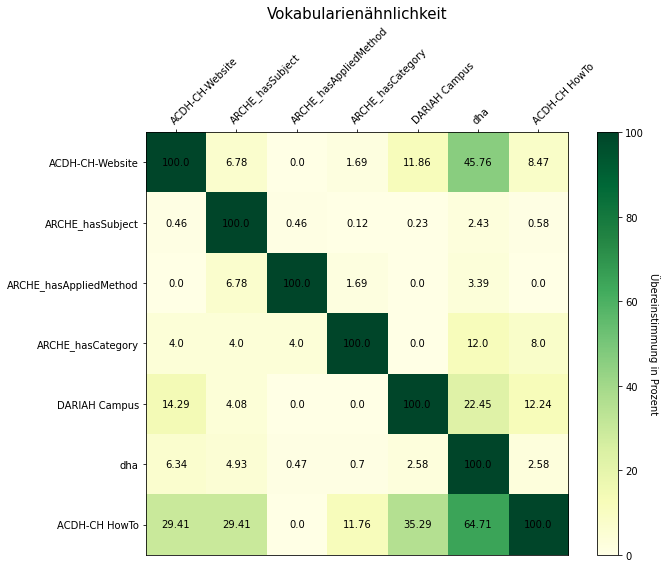

In [59]:
#Heatmap-Visualisierung der prozentualen Vokabularienähnlichkeit

#Zeilen- und Spaltenlabels definieren
zeilen = ["ACDH-CH-Website", "ARCHE_hasSubject", "ARCHE_hasAppliedMethod", "ARCHE_hasCategory", "DARIAH Campus", "dha", "ACDH-CH HowTo"]
spalten = ["ACDH-CH-Website", "ARCHE_hasSubject", "ARCHE_hasAppliedMethod", "ARCHE_hasCategory", "DARIAH Campus", "dha", "ACDH-CH HowTo"]

#Daten definieren
tabelle_proz_zahlen = [] #neue Liste von Listen exkl. Strings notwendig
for zeile in tabelle_proz:
    nur_zahlen = [x for x in zeile if type(x)!=str]
    tabelle_proz_zahlen.append(nur_zahlen)
daten = np.array(tabelle_proz_zahlen)

#Initialisieren von Plots
fig, heatmap = plt.subplots()
im = heatmap.imshow(daten, cmap="YlGn")

#Größe der Abbildung einstellen
fig.set_figheight(8)
fig.set_figwidth(10)

#Labels hinzufügen
heatmap.set_xticks(np.arange(len(spalten)), labels=spalten)
heatmap.set_yticks(np.arange(len(zeilen)), labels=zeilen)

#Spaltenbeschriftung nach oben
heatmap.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

#Spaltenbeschriftung rotieren
plt.setp(heatmap.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

#Loop über Daten --> Werte pro Heatmap-Kästchen anzeigen
for i in range(len(zeilen)):
    for j in range(len(spalten)):
        text = heatmap.text(j, i, daten[i, j], ha="center", va="center", color="black")

#Legende (Colorbar) hinzufügen
legende = heatmap.figure.colorbar(im, ax=heatmap)
legende.ax.set_ylabel(ylabel="Übereinstimmung in Prozent", rotation=-90, va="bottom")

#Titel hinzufügen
heatmap.set_title("Vokabularienähnlichkeit", fontsize=15)

#Verbesserung des Layouts
fig.tight_layout()

plt.show()

### Miteinbeziehen von Counts  [in Arbeit]
- bisher Type-Level (distinkte Tags)
- ab hier Token-Level (Verwendungshäufigkeit einzelner Tags)

### Speicherung der Ergebnisse

In [ ]:
#Speicherung des Vergleichs als .csv (aktuell nur Taglevel, exklusive Vocab-Matrix, Counts etc)

with open("Vokabularienvergleich.csv", "w", newline = "", encoding = "utf-8") as datei:
    writer = csv.writer(datei, delimiter=';', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(["Tag", "ACDH-CH-Website", "ARCHE_hasSubject", "ARCHE_hasAppliedMethod", "ARCHE_hasCategory", "DARIAH Campus", "dha", "ACDH-CH HowTo", "Summe"])
    for key in vgl.keys():
        writer.writerow([key, vgl[key]["count_acdh"], vgl[key]["count_arche_hasSubject"], vgl[key]["count_arche_hasAppliedMethod"], vgl[key]["count_arche_hasCategory"], vgl[key]["count_dc"], vgl[key]["count_dha"], vgl[key]["count_ht"], vgl[key]["sum"]])

#Speicherung als Dictionary

with open("Vokabularienvergleich.json", "w", encoding = "utf-8") as datei:
    json.dump(vgl, datei, ensure_ascii = False)